Xander Fermier
2/15/22
Analyzes Amazon data, specifically
 - Total money
 - Most and least expensive orders, average and median orders
 - How much payed in taxes and effective sales tax rate
 - Spending habits day-by-day in a bar graph

<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
Total Money Spent: $55734.62.
Highest Single Order: $702.54.
Lowest Single Order: $0.97.
Average Spent Per Order: $29.9.
Median Order: $26.74.
Total Spent in Taxes: $2734.12.
Effective Sales Tax Rate: 4.24%.


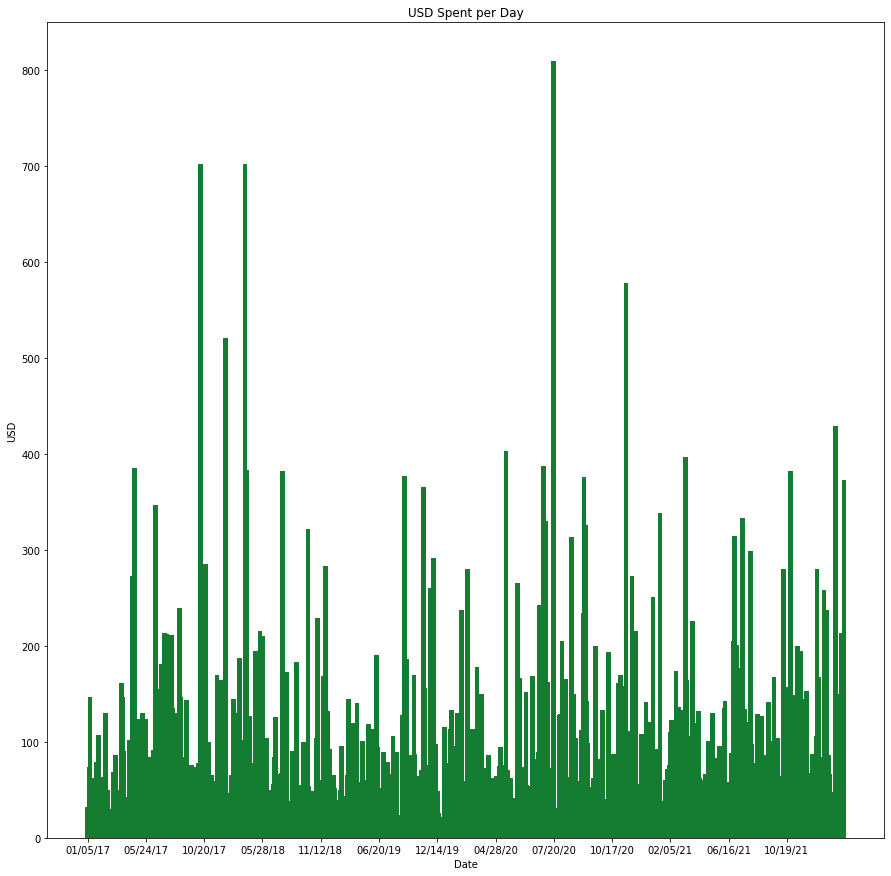

In [1]:
#total money spent
import csv, os
import numpy as np
import matplotlib.pyplot as plt

os.system("cls")

file = open("01-Jan-2017_to_15-Feb-2022.csv", encoding="utf-8")
orderFile = csv.reader(file)
header = next(orderFile)

# colName = []
importantNames = ["Order Date", "List Price Per Unit", "Purchase Price Per Unit", "Quantity", "Item Subtotal", "Item Subtotal Tax", "Item Total"]
importantNamesIndexes = []
uselessNamesIndexes = []

for item in header:
    if item in importantNames:
        importantNamesIndexes.append(header.index(item))
    else:
        uselessNamesIndexes.append(header.index(item))

# print(importantNamesIndexes)

orderListArray = []
# np.genfromtxt("01-Jan-2017_to_15-Feb-2022.csv", delimiter=",", encoding="utf-8")

for row in orderFile:
    orderListArray.append(row)

orderListFull = np.asarray(orderListArray)

#removes unnecessary columns
orderList = np.delete(orderListFull, uselessNamesIndexes, 1)

#removes any rows that have $0.0 for total cost
orderList = np.delete(orderList, np.where(orderList[:,importantNames.index("Item Total")] == "$0.00")[0], axis=0)
# print(orderList)

counterRow = 0
counterCol = 0

highestOrder = 0.0
lowestOrder = 999999.0

salesTaxRateTotal = 0.0

currentDate = orderList[0][0]
prevDate = orderList[0][0]

prices = [0.0]

for row in orderList:
    currentDate = orderList[counterRow][0]
    for col in row:
        if "$" in col:
            orderList[counterRow][counterCol] = col.replace("$", "")
            if counterCol == importantNames.index("Item Total"):
                if(float(orderList[counterRow][counterCol]) > float(highestOrder)):
                    highestOrder = orderList[counterRow][counterCol]
                if(float(orderList[counterRow][counterCol]) < float(lowestOrder)):
                    lowestOrder = float(orderList[counterRow][counterCol])
                if(currentDate == prevDate):
                    prices[len(prices)-1] += float(orderList[counterRow][counterCol])
                else:
                    prices.append(float(orderList[counterRow][counterCol]))
                    prevDate = currentDate
        counterCol+=1
    salesTaxRate = float(orderList[counterRow][importantNames.index("Item Subtotal Tax")])/float(orderList[counterRow][importantNames.index("Item Total")]) * 100
    salesTaxRateTotal += salesTaxRate
    counterRow+=1
    counterCol = 0

prices = np.round(prices, decimals=2)

salesTaxRateTotal /= np.size(orderList, 0)
# print(orderList[0])

#sums up and prints the sum total of all expenses
totalSpent = np.sum(orderList[:,importantNames.index("Item Total")].astype(np.float32))
# print(orderList[:,importantNames.index("Item Total")].astype(np.float32)[0])
print("Total Money Spent: $" + str(round(totalSpent, 2)) + ".")

#prints the highest and lowest cost which is found when removing all of the $ from the prices
print("Highest Single Order: $" + str(highestOrder) + ".")
print("Lowest Single Order: $" + str(lowestOrder) + ".")

#calculates average cost of an order
orderAverage = totalSpent/np.size(orderList, 0)
print("Average Spent Per Order: $" + str(round(orderAverage, 2)) + ".")

#sorts the list by total price spent so that the median can be correctly found
orderListSorted = orderList[np.argsort(orderList[:,importantNames.index("Item Total")])]
orderMedian = orderListSorted[round(np.size(orderList, 0)/2)][importantNames.index("Item Total")]
print("Median Order: $" + str(orderMedian) + ".")

#calculates the amount spent from taxes
totalSpentTaxes = totalSpent = np.sum(orderList[:,importantNames.index("Item Subtotal Tax")].astype(np.float32))
print("Total Spent in Taxes: $" + str(round(totalSpentTaxes, 2)) + ".")

print("Effective Sales Tax Rate: " + str(round(salesTaxRateTotal, 2)) + "%.")

# dates = np.arange(np.size(orderList, 0))
datesString = orderList[:,0]
_, datesStringIndexes = np.unique(datesString, return_index=True)
datesString = datesString[np.sort(datesStringIndexes)]

datesNum = np.arange(np.size(datesString))

# print(prices)
# print(np.size(datesString))

plt.bar(datesString, prices, color="#157d31", width=4)
plt.xticks(np.arange(0, np.size(datesString), 365))
plt.title("USD Spent per Day")
plt.xlabel("Date")
plt.ylabel("USD")
bar = plt.gcf()
bar.set_size_inches(15, 15, forward=True)
plt.show()